# NAME- DIVYANSH SINGH

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

class DataVisualizer:
    def __init__(self, folder_path, data_file, country_metadata_file, indicator_metadata_file, year):
        self.folder_path = folder_path
        self.data_file = data_file
        self.country_metadata_file = country_metadata_file
        self.indicator_metadata_file = indicator_metadata_file
        self.year = year

        self.data = None
        self.country_metadata = None
        self.indicator_name = None

    def read_data(self):
        self.data = pd.read_csv(os.path.join(self.folder_path, self.data_file), skiprows=4)
        self.country_metadata = pd.read_csv(os.path.join(self.folder_path, self.country_metadata_file))
        indicator_metadata = pd.read_csv(os.path.join(self.folder_path, self.indicator_metadata_file))
        self.indicator_name = indicator_metadata['INDICATOR_NAME'][0]

    def create_histogram(self, column_name):
        plt.figure(figsize=(10, 6))
        plt.hist(self.data[column_name], bins=20, color='skyblue', edgecolor='black')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {self.indicator_name} ({self.year})')
        plt.grid()
        plt.show()

    def create_bar_plot(self, data, x_column, y_column, xlabel, ylabel, title, rotation=True):
        plt.figure(figsize=(10, 6))
        plt.bar(data[x_column], data[y_column], color='skyblue', edgecolor='black')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def create_bar_plot_seaborn(self, data, x_column, y_column, xlabel, ylabel, title, rotation=True):
        plt.figure(figsize=(10, 6))
        sns.barplot(data=data, x=x_column, y=y_column, edgecolor='black')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def create_bar_plot_plotly(self, data, x_column, y_column, xlabel, ylabel, title, rotation=True):
        fig = px.bar(data, x=x_column, y=y_column, color=y_column, title=title, color_continuous_scale='plotly3')
        if rotation:
            fig.update_layout(xaxis_tickangle=-45)
        fig.show()

    def plot_histogram(self):
        self.create_histogram(self.year)

    def plot_top_10(self):
        title = f'Top 10 Countries for {self.indicator_name} ({self.year})'
        top_countries_data = self.data.nlargest(10, self.year)
        self.create_bar_plot_plotly(top_countries_data, 'Country Name', self.year, 'Country', 'Value', title, rotation=False)

    def plot_bottom_10(self):
        title = f'Bottom 10 Countries for {self.indicator_name} ({self.year})'
        bottom_countries_data = self.data.nsmallest(10, self.year)
        self.create_bar_plot_plotly(bottom_countries_data, 'Country Name', self.year, 'Country', 'Value', title, rotation=False)

    def plot_by_income_group(self):
        title = f'Average Value by Income Group for {self.indicator_name} ({self.year})'
        income_group_data = self.data.merge(self.country_metadata[['Country Code', 'IncomeGroup']], on='Country Code')
        income_group_means = income_group_data.groupby('IncomeGroup')[self.year].mean().reset_index()
        self.create_bar_plot_seaborn(income_group_means, 'IncomeGroup', self.year, 'Income Group', 'Average Value', title)

    def plot_by_region(self):
        title = f'Average by Region for {self.indicator_name} ({self.year})'
        region_data = self.data.merge(self.country_metadata[['Country Code', 'Region']], on='Country Code')
        region_means = region_data.groupby('Region')[self.year].mean().reset_index()
        self.create_bar_plot_seaborn(region_means, 'Region', self.year, 'Region', 'Average Value', title)

    def analyze(self):
        self.read_data()
        self.plot_histogram()
        self.plot_top_10()
        self.plot_bottom_10()
        self.plot_by_income_group()
        self.plot_by_region()

## 1. Unemployment, total (% of total labor force) (modeled ILO estimate)


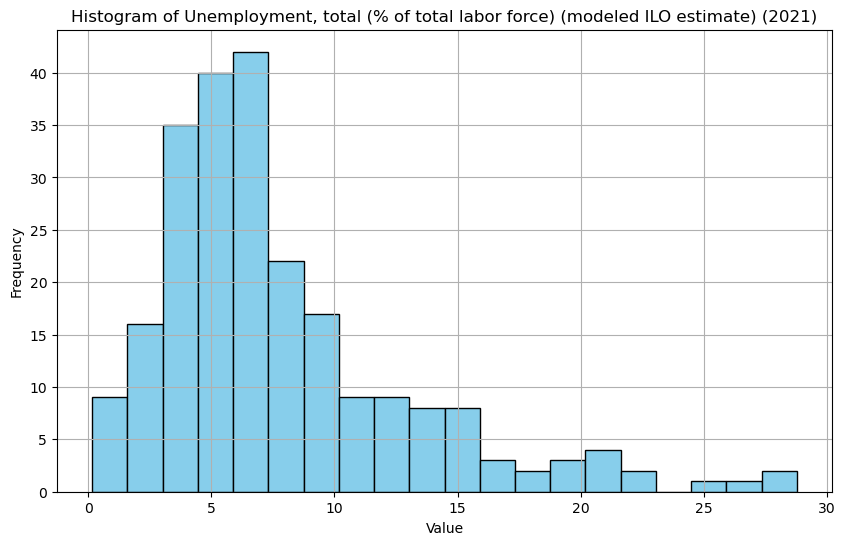

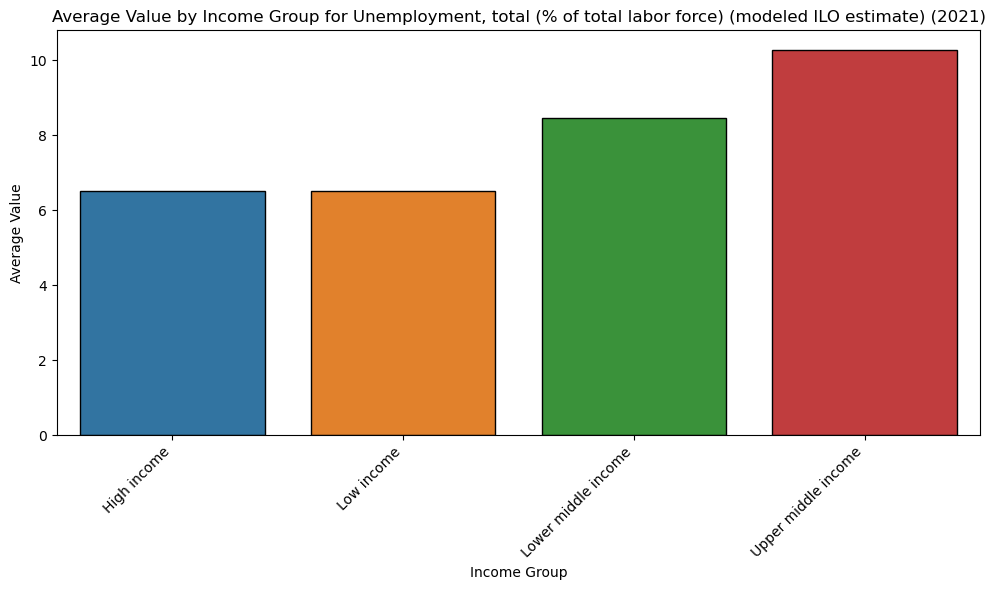

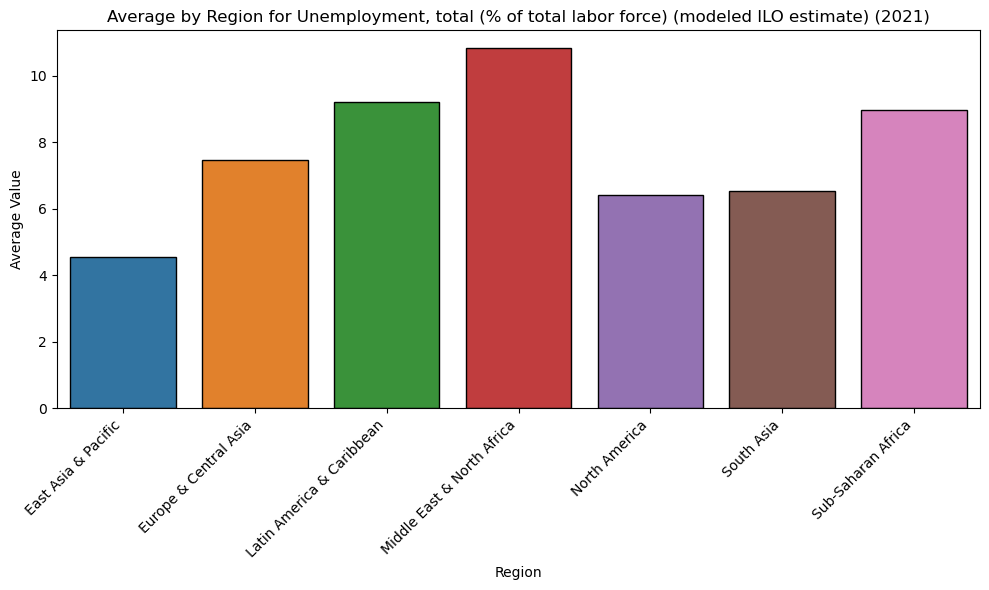

In [6]:
 
visualizer_unemployment = DataVisualizer("DATASETS/Unemployment, total (% of total labor force) (modeled ILO estimate)",
                            "API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_5728922.csv",
                            "Metadata_Country_API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_5728922.csv",
                            "Metadata_Indicator_API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_5728922.csv",
                            '2021')  


visualizer_unemployment.analyze()


### Observation Report:

**Histogram Analysis:**  
Analyzing the histogram for "Unemployment, total (% of total labor force) (modeled ILO estimate)" helps visualize the distribution of unemployment rates across various countries. This insight allows us to identify whether unemployment rates are concentrated in specific ranges or if they exhibit a wide range of values.

**Top and Bottom 10 Countries:**  
Examining the top 10 and bottom 10 countries in terms of unemployment rates provides a clear picture of the countries facing significant labor market challenges and those with more stable employment situations. This comparison highlights disparities in job opportunities and economic conditions.

**Analysis by Income Group:**  
Exploring unemployment rates by income group allows us to understand how economic prosperity influences employment trends. High unemployment rates in lower-income countries might point to structural barriers, while lower rates in higher-income nations could indicate a more robust labor market.

**Analysis by Region:**  
Studying unemployment rates by region gives us insights into regional disparities in employment. These disparities could stem from factors like economic development, industry composition, and government policies, which affect labor market dynamics.

**Conclusion:**  
"Unemployment, total (% of total labor force) (modeled ILO estimate)" is a crucial indicator reflecting the health of a country's job market. Understanding the patterns and trends in unemployment rates is essential for policymakers to develop targeted strategies to address unemployment challenges, promote inclusive growth, and ensure a stable and productive workforce.

## 2. GDP growth (annual %)


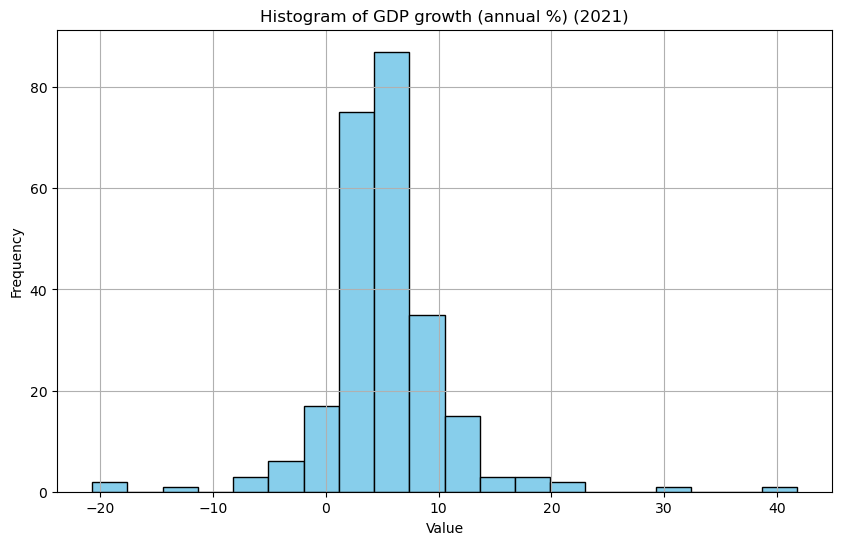

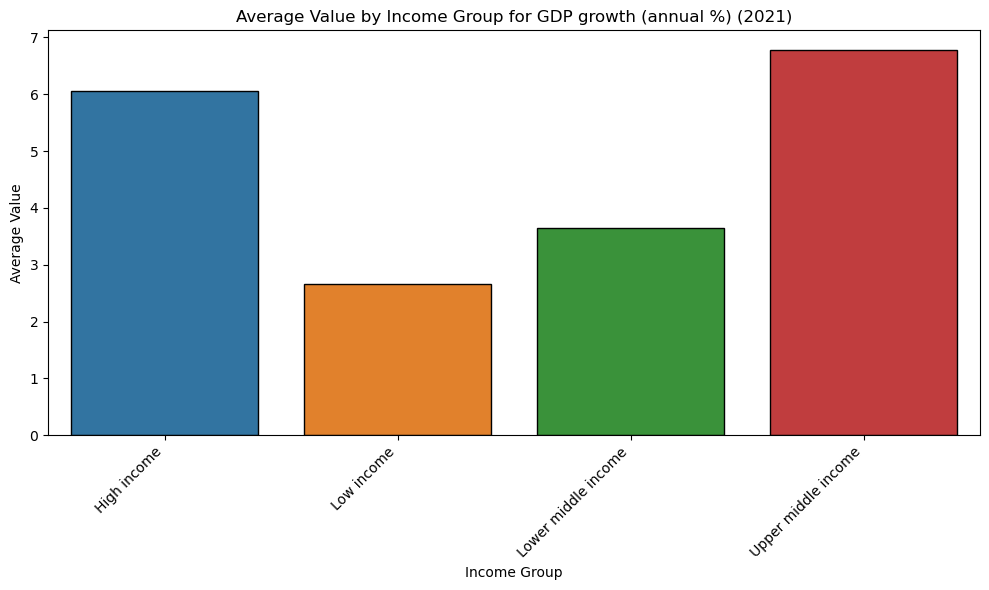

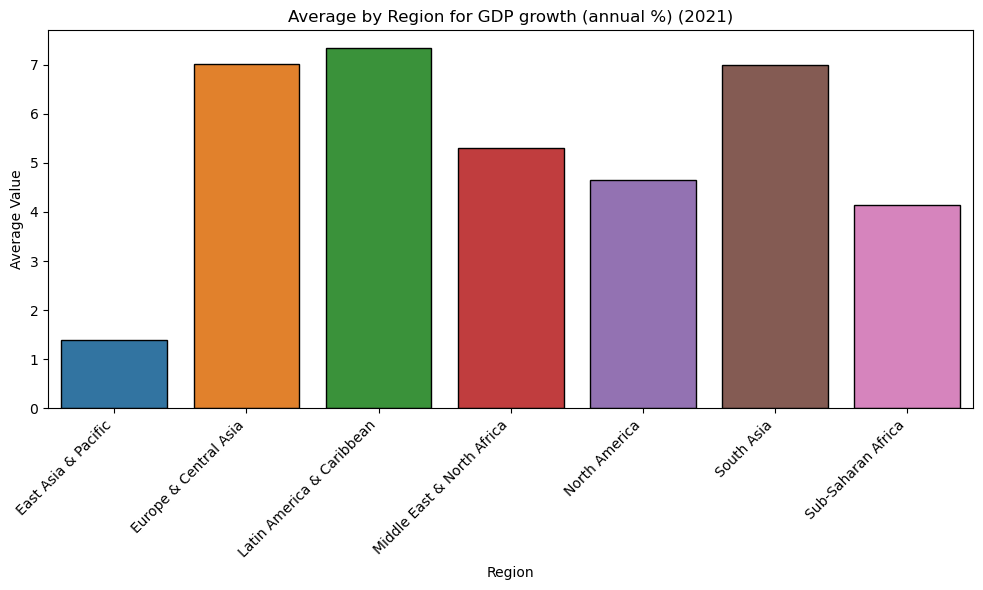

In [8]:
# Create an instance of the DataVisualizer class 
visualizer_GDP_growth = DataVisualizer("DATASETS/GDP growth (annual %)",
                            "API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_5728939.csv",
                            "Metadata_Country_API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_5728939.csv",
                            "Metadata_Indicator_API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_5728939.csv",
                            '2021')  # Change to the desired year

#analyze the data
visualizer_GDP_growth.analyze()


### Observation Report:

**Histogram Analysis:**  
The histogram analysis of "GDP growth (annual %)" offers insights into the distribution of economic growth rates across different countries. This visualization helps us understand variations in economic performance, from countries experiencing robust growth to those facing economic challenges.

**Top and Bottom 10 Countries:**  
Identifying the top 10 and bottom 10 countries based on GDP growth rates allows us to recognize economic success stories and areas with stagnant or negative growth. High growth rates often indicate thriving economies, while low rates may signal the need for policy reforms or investments.

**Analysis by Income Group:**  
Analyzing GDP growth by income group reveals how economic performance is linked to income levels. High-income countries may have more diversified economies and resources, contributing to steady growth, while lower-income nations might be susceptible to external shocks and fluctuations.

**Analysis by Region:**  
Exploring GDP growth by region provides insights into economic trends within different geographic areas. Regional disparities can arise due to factors like trade dynamics, political stability, and investment climate.

**Conclusion:**  
"GDP growth (annual %)" is a key indicator of a country's economic health and progress. Positive growth indicates expanding economic opportunities, job creation, and improved living standards. By analyzing growth patterns across income groups and regions, policymakers can make informed decisions to foster sustainable economic development and address challenges that hinder growth.

## 3. Access to electricity (% of population)


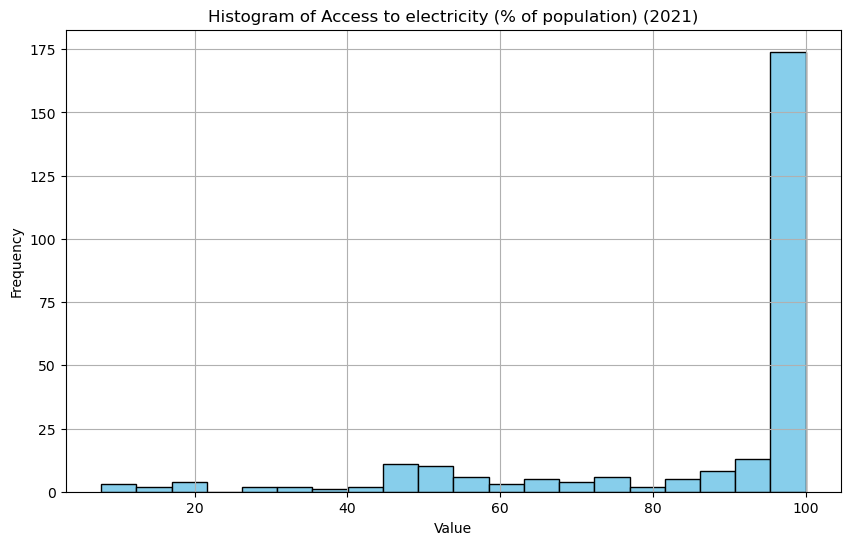

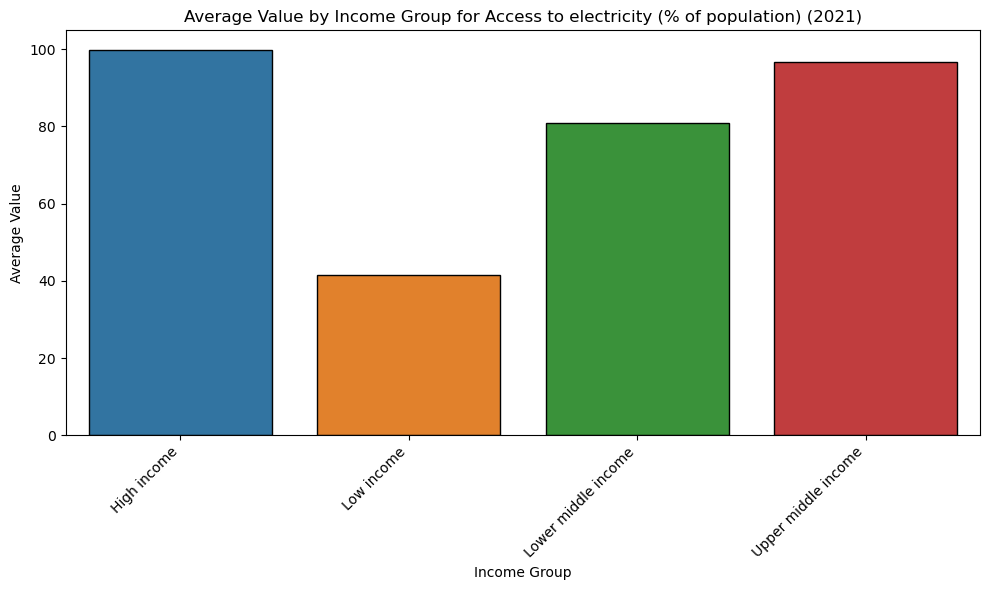

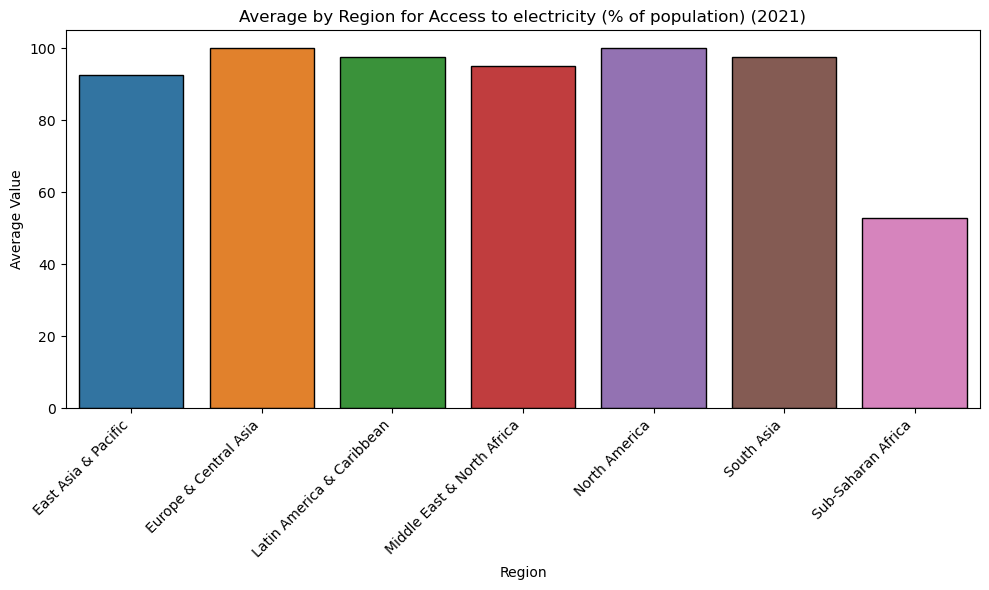

In [4]:
# Create an instance of the DataVisualizer class 
visualizer_electricity = DataVisualizer("DATASETS/Access to electricity (% of population)",
                            "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                            "Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                            "Metadata_Indicator_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_5729318.csv",
                            '2021')  # Change to the desired year

#analyze the data
visualizer_electricity.analyze()

### Observation Report:

**Histogram Analysis:**  
The histogram analysis of "Access to electricity (% of population)" provides insights into the distribution of electricity access across different countries. This visualization reveals disparities in electrification rates and highlights the challenges some nations face in ensuring universal access to electricity.

**Top and Bottom 10 Countries:**  
Identifying the top 10 and bottom 10 countries based on electricity access rates helps to pinpoint success stories and areas requiring attention. High electrification rates indicate infrastructure development, while low rates underscore the need for investments and policy interventions.

**Analysis by Income Group:**  
Analyzing electricity access by income group unveils the link between economic prosperity and energy access. Higher-income countries typically have better infrastructure, contributing to higher electrification rates, whereas lower-income nations might face hurdles in providing electricity to all citizens.

**Analysis by Region:**  
Exploring electricity access by region sheds light on regional disparities and factors influencing infrastructure development. Geography, economic conditions, and governance play crucial roles in determining how efficiently countries electrify their populations.

**Conclusion:**  
"Access to electricity (% of population)" is a fundamental indicator of a nation's development and quality of life. Universal access to electricity is essential for economic growth, education, healthcare, and overall well-being. By examining variations in electrification rates across income groups and regions, policymakers can make informed decisions to bridge the gap and ensure that all citizens have the opportunity to benefit from this essential service.

## 4. Individuals using the Internet (% of population)


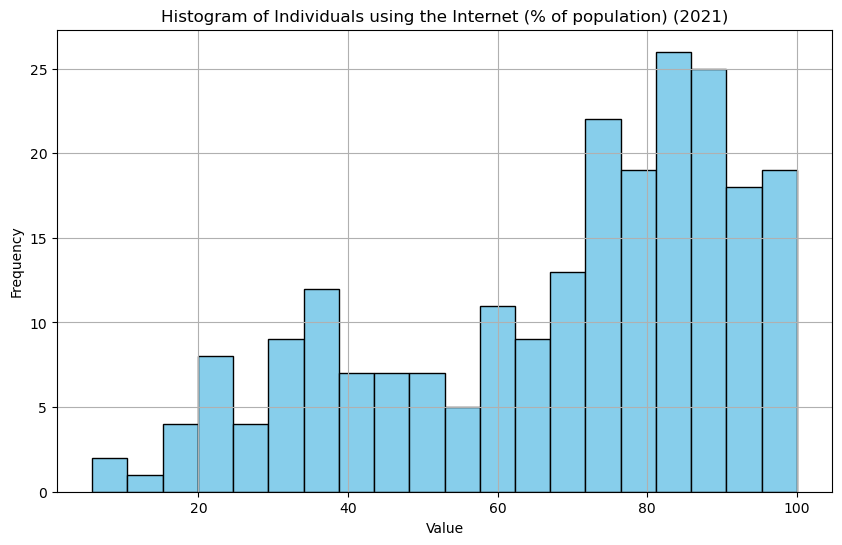

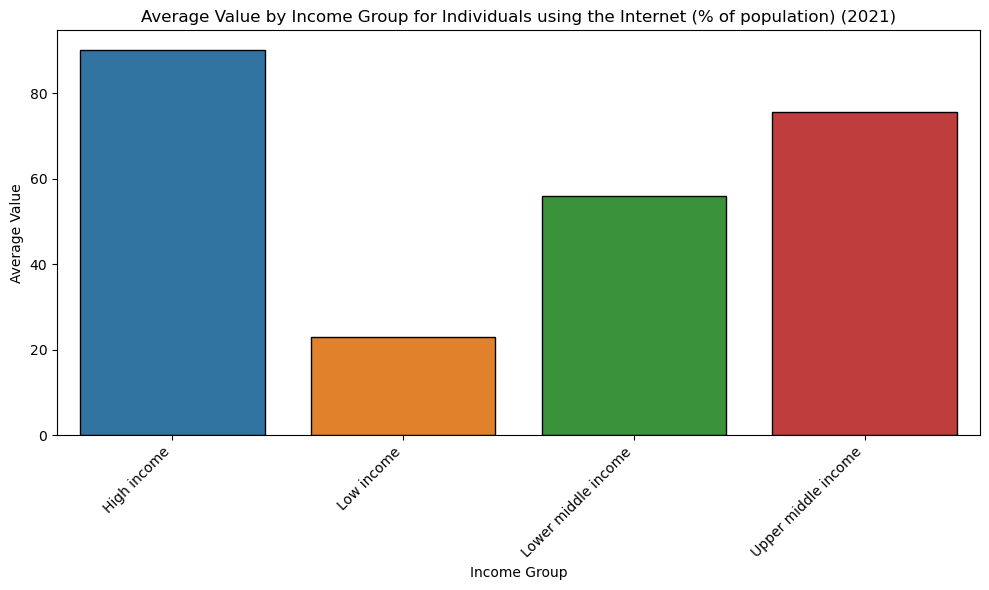

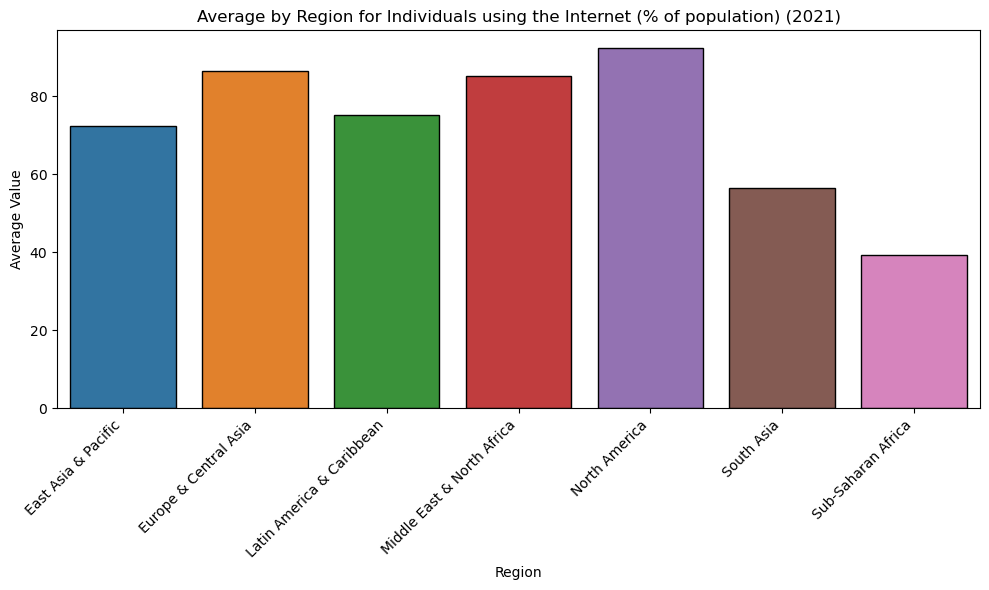

In [9]:
# Create an instance of the DataVisualizer class 
visualizer_Internet = DataVisualizer("DATASETS/Individuals using the Internet (% of population)",
                            "API_IT.NET.USER.ZS_DS2_en_csv_v2_5729127.csv",
                            "Metadata_Country_API_IT.NET.USER.ZS_DS2_en_csv_v2_5729127.csv",
                            "Metadata_Indicator_API_IT.NET.USER.ZS_DS2_en_csv_v2_5729127.csv",
                            '2021')  # Change to the desired year

#analyze the data
visualizer_Internet.analyze()

### Observation Report

**Histogram Analysis:**  
Examining the distribution of "Individuals Using the Internet (% of Population)" reveals the prevalence of internet access among different population segments. The histogram showcases the spectrum of internet adoption, from countries with limited access to those with widespread connectivity.

**Top and Bottom 10 Countries:**  
Identifying the top 10 and bottom 10 countries based on internet usage provides insights into regional trends and disparities. Countries with high percentages demonstrate effective digital inclusion efforts, while those at the bottom highlight areas for improvement in digital access.

**Analysis by Income Group:**  
Grouping countries by income levels provides a nuanced perspective on digital divide trends. Higher-income countries tend to have higher internet penetration, emphasizing the role of economic development in fostering digital connectivity.

**Analysis by Region:**  
Analyzing internet usage across different regions offers a comprehensive view of global digital trends. Disparities between regions reflect varying levels of infrastructure development, policies, and socioeconomic factors influencing internet adoption.

**Conclusion:**  
The "Individuals Using the Internet (% of Population)" indicator showcases the importance of digital connectivity for economic and social progress. Efforts to bridge the digital divide should prioritize both regional and income-based disparities. By fostering inclusive policies and investing in infrastructure, countries can ensure that the benefits of the digital age are accessible to all segments of the population.

## 5. Life expectancy at birth, total (years)


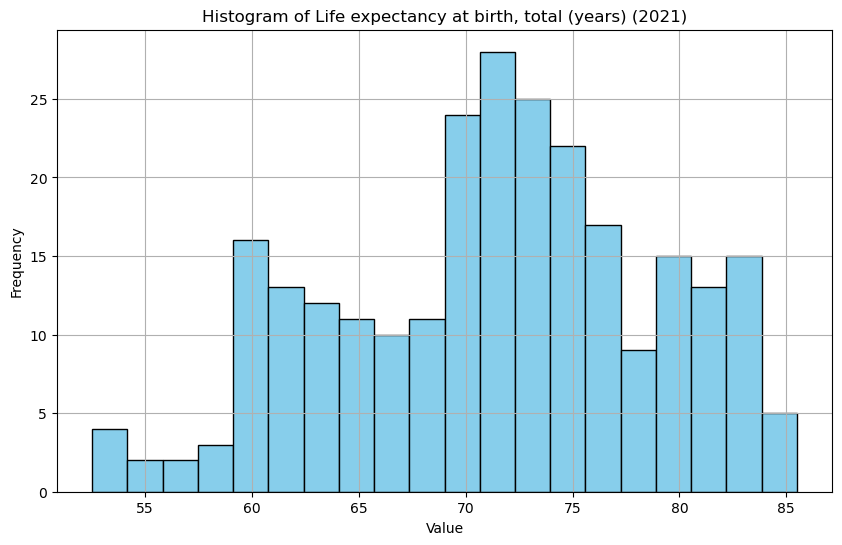

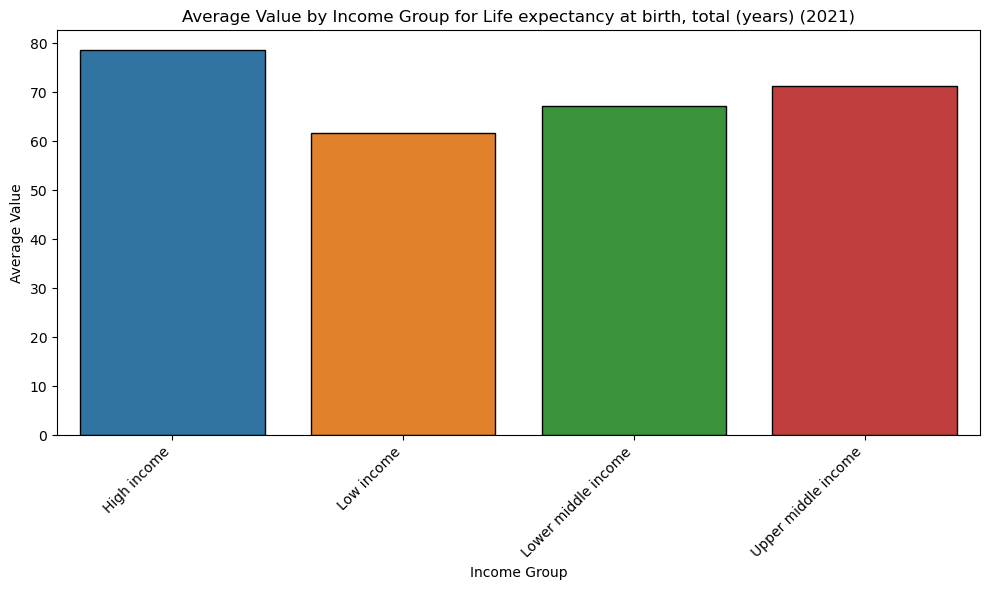

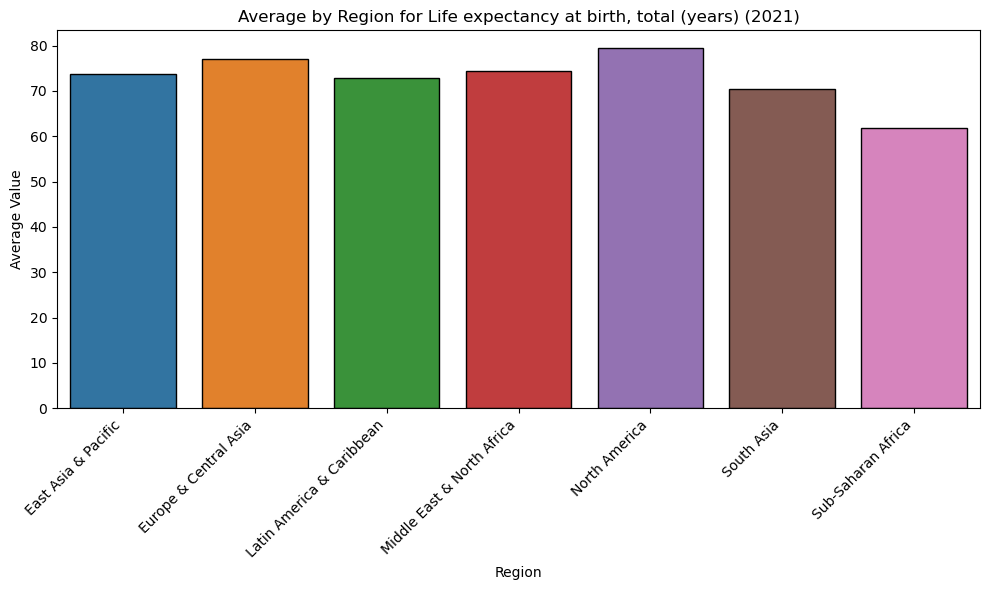

In [10]:
# Create an instance of the DataVisualizer class 
visualizer_Life_expectancy = DataVisualizer("DATASETS/Life expectancy at birth, total (years)",
                            "API_SP.DYN.LE00.IN_DS2_en_csv_v2_5728852.csv",
                            "Metadata_Country_API_SP.DYN.LE00.IN_DS2_en_csv_v2_5728852.csv",
                            "Metadata_Indicator_API_SP.DYN.LE00.IN_DS2_en_csv_v2_5728852.csv",
                            '2021')  # Change to the desired year

#analyze the data
visualizer_Life_expectancy.analyze()

### Observation Report:

**Histogram Analysis:**  
Exploring the distribution of "Life Expectancy at Birth" provides insights into the overall health and well-being of different populations. The histogram illustrates the range of life expectancies, highlighting variations between countries.

**Top and Bottom 10 Countries:**  
Identifying the top 10 and bottom 10 countries in terms of life expectancy offers a snapshot of global health disparities. Countries with higher life expectancies showcase effective healthcare systems and social support, while those with lower figures may face challenges in healthcare access and public health.

**Analysis by Income Group:**  
Segmenting countries based on income groups reveals how economic factors influence life expectancy. Higher-income countries generally have longer life expectancies due to better healthcare infrastructure and overall living conditions.

**Analysis by Region:**  
Examining life expectancy across different regions unveils regional health trends. Disparities may be influenced by factors such as disease prevalence, healthcare access, and socio-economic conditions specific to each region.

**Conclusion:**  
The "Life Expectancy at Birth" indicator serves as a crucial measure of a population's overall health and quality of life. Efforts to improve life expectancy should focus on strengthening healthcare systems, promoting healthy lifestyles, and addressing socio-economic disparities. By addressing the factors influencing life expectancy, countries can enhance the well-being of their populations and achieve more equitable health outcomes.

## 6. Poverty headcount ratio at \$2.15 a day (2017 PPP) (% of population)


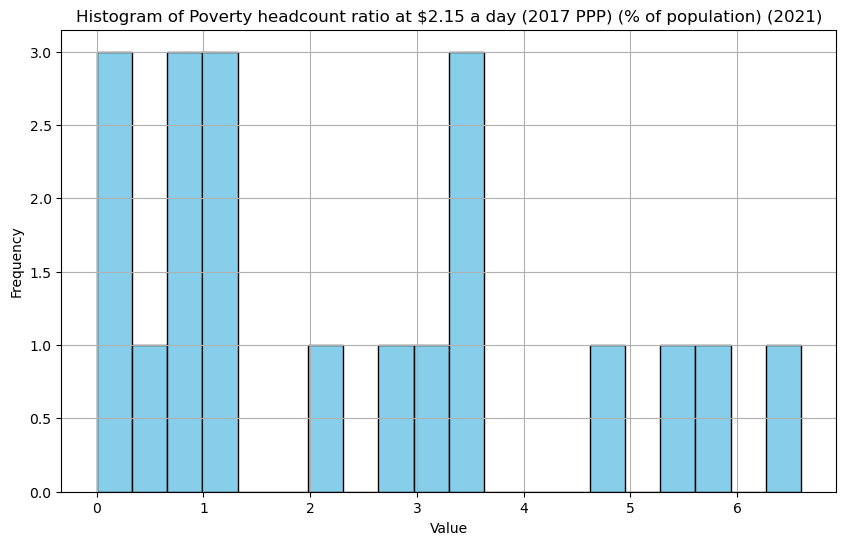

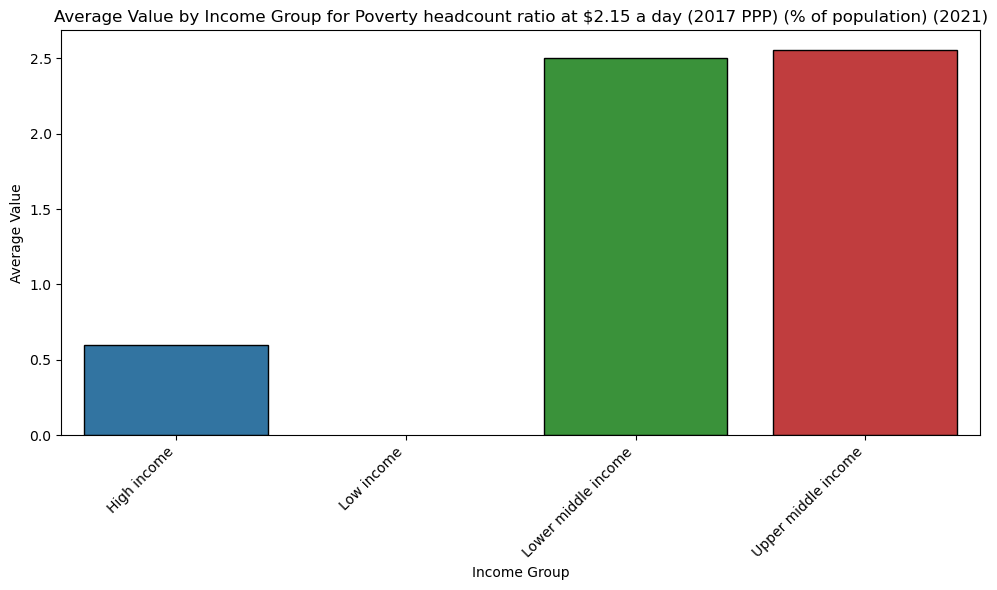

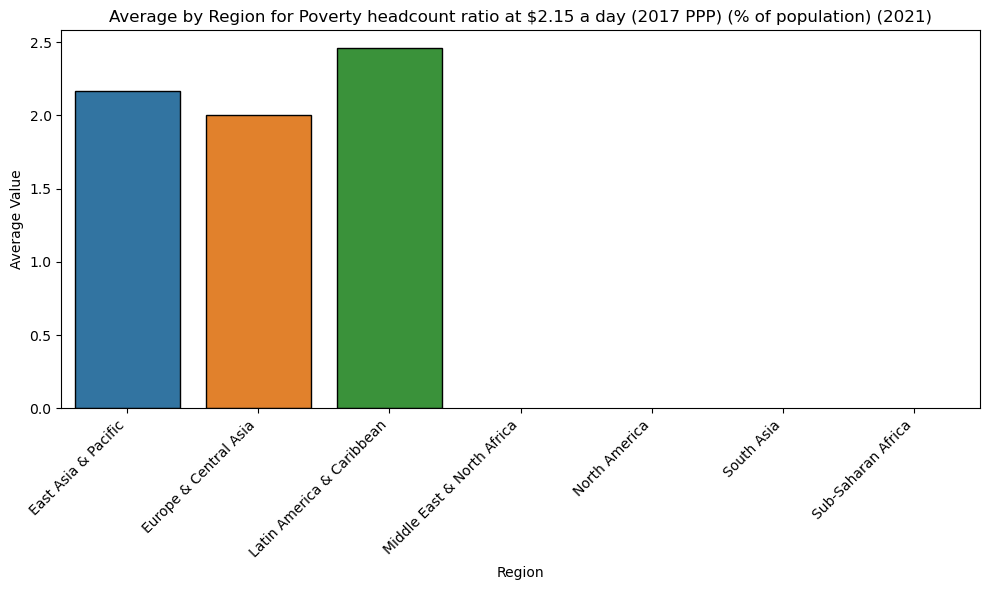

In [11]:
# Create an instance of the DataVisualizer class 
visualizer_Poverty = DataVisualizer("DATASETS/Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)",
                            "API_SI.POV.DDAY_DS2_en_csv_v2_5728820.csv",
                            "Metadata_Country_API_SI.POV.DDAY_DS2_en_csv_v2_5728820.csv",
                            "Metadata_Indicator_API_SI.POV.DDAY_DS2_en_csv_v2_5728820.csv",
                            '2021')  # Change to the desired year

#analyze the data
visualizer_Poverty.analyze()

### Observation Report:

**Histogram Analysis:**  
Analyzing the distribution of "Poverty Headcount Ratio at $2.15 a day" provides insights into the prevalence of poverty across different countries. The histogram illustrates the variation in poverty rates, shedding light on the economic challenges faced by populations.

**Top and Bottom 10 Countries:**  
Identifying the top 10 and bottom 10 countries based on poverty headcount ratio offers a snapshot of global poverty disparities. Countries with lower poverty rates demonstrate more successful poverty reduction efforts, while those with higher rates face challenges in addressing economic inequalities.

**Analysis by Income Group:**  
Categorizing countries into income groups helps to understand how poverty rates correlate with economic development. Lower-income countries tend to have higher poverty rates due to limited access to resources, education, and opportunities.

**Analysis by Region:**  
Examining poverty headcount ratios across regions highlights regional disparities in economic well-being. Factors such as political stability, access to education, and economic opportunities contribute to variations in poverty rates.

**Conclusion:**  
The "Poverty Headcount Ratio at $2.15 a day" indicator provides valuable insights into global poverty trends. Addressing poverty requires comprehensive strategies that encompass social safety nets, education, job creation, and equitable economic growth. By targeting both income and non-income dimensions of poverty, countries can work towards reducing poverty rates and improving the well-being of their populations.

## 7. Urban population (% of total population)


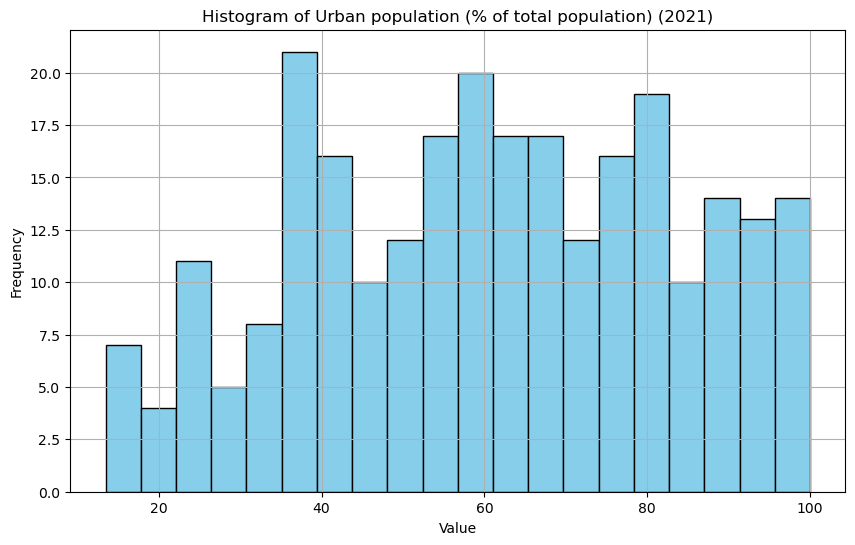

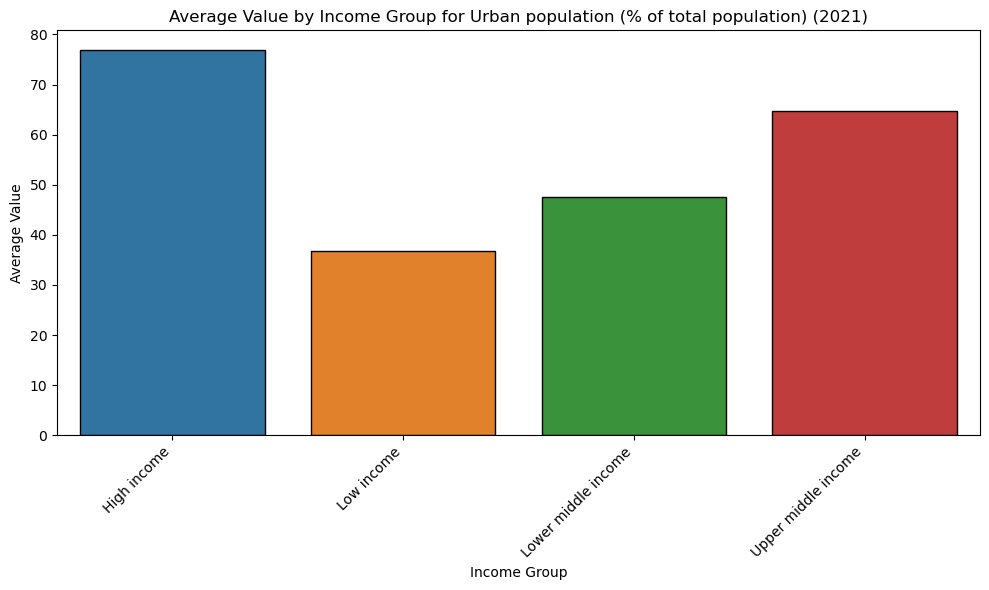

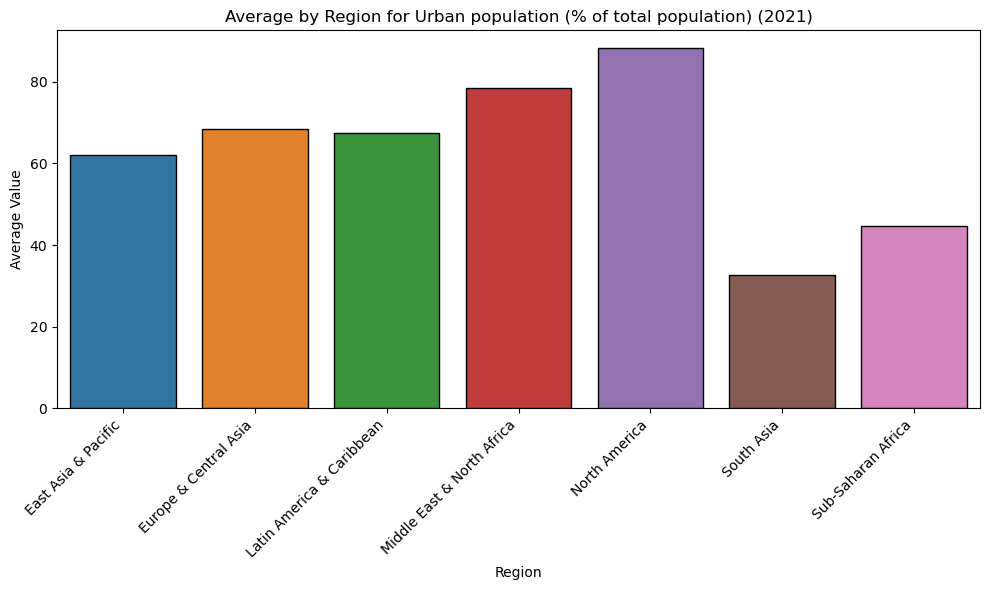

In [12]:
# Create an instance of the DataVisualizer class 
visualizer_Urban = DataVisualizer("DATASETS/Urban population (% of total population)",
                            "API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_5734574.csv",
                            "Metadata_Country_API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_5734574.csv",
                            "Metadata_Indicator_API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_5734574.csv",
                            '2021')  # Change to the desired year

#analyze the data
visualizer_Urban.analyze()

### Observation Report:

**Histogram Analysis:**  
Analyzing the distribution of "Urban Population (% of Total Population)" helps understand the degree of urbanization across countries. The histogram reveals variations in urbanization rates, showcasing the differences between predominantly rural and urbanized societies.

**Top and Bottom 10 Countries:**  
Identifying the top 10 and bottom 10 countries based on urban population percentages offers insights into the level of urban development. Highly urbanized countries often have advanced infrastructure, while countries with lower urbanization rates might focus on rural development and agriculture.

**Analysis by Income Group:**  
Categorizing countries by income group in relation to their urban population percentages reveals urbanization's relationship with economic development. Higher-income countries tend to have higher urbanization rates due to greater opportunities and access to services in urban areas.

**Analysis by Region:**  
Examining urbanization rates by region helps identify regional trends and disparities. Factors such as migration, economic opportunities, and quality of life influence urbanization patterns in different parts of the world.

**Conclusion:**  
The "Urban Population (% of Total Population)" indicator offers insights into global urbanization trends. As countries continue to experience population growth and migration, understanding the dynamics of urbanization is crucial for effective urban planning, infrastructure development, and ensuring the well-being of urban and rural populations alike.

## 8. Literacy rate, adult female (% of females ages 15 and above)


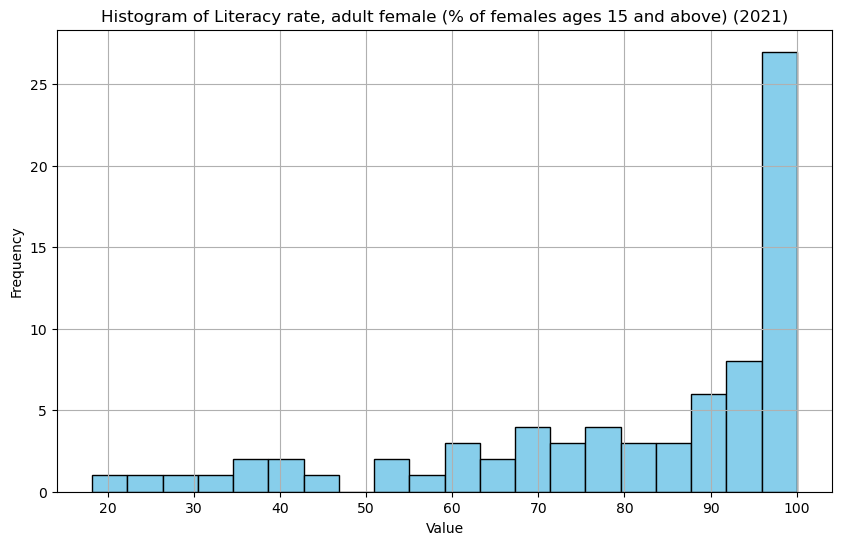

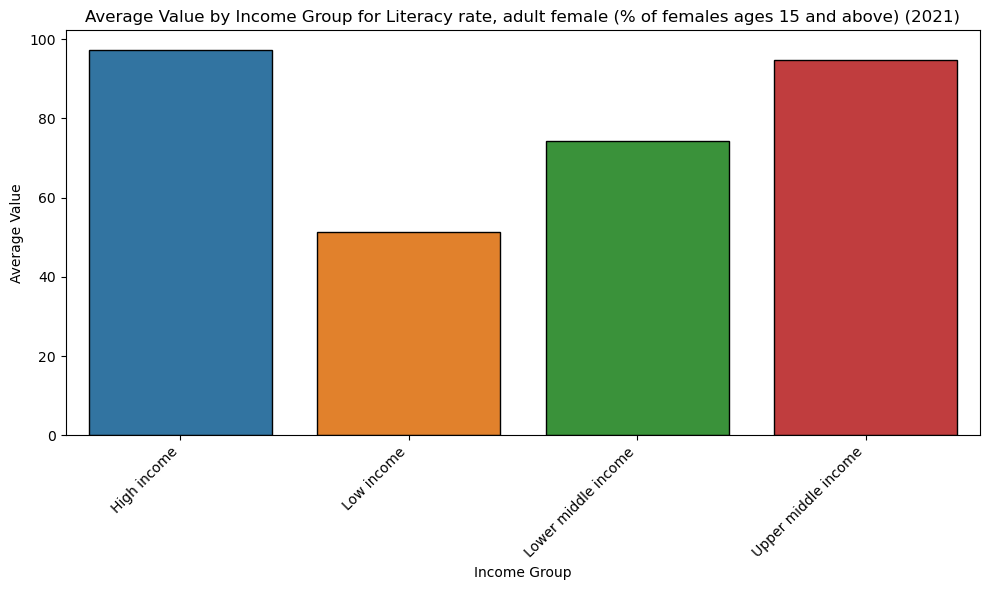

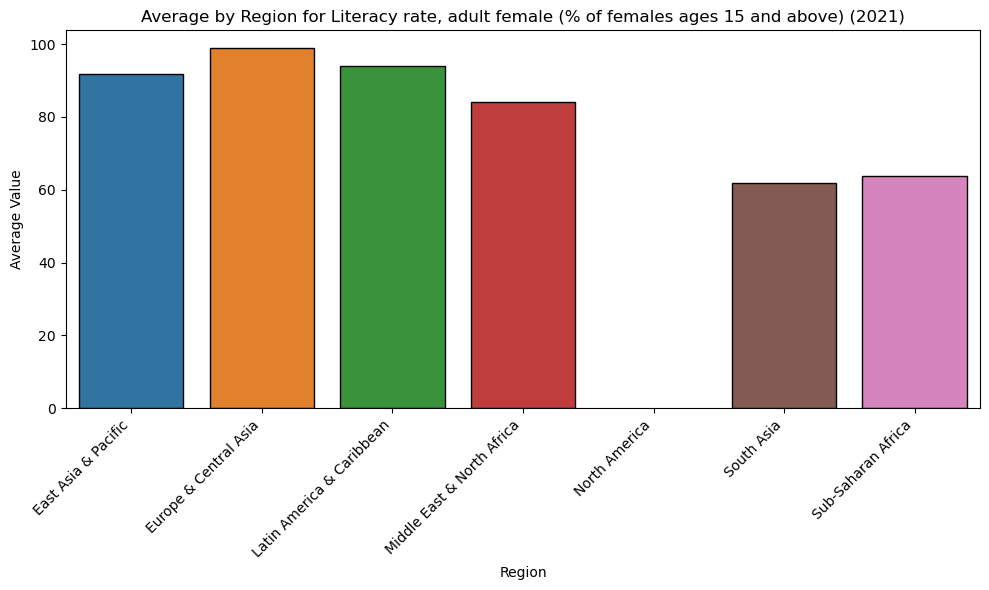

In [13]:
# Create an instance of the DataVisualizer class 
visualizer_Literacy_rate_female = DataVisualizer("DATASETS/Literacy rate, adult female (% of females ages 15 and above)",
                            "API_SE.ADT.LITR.FE.ZS_DS2_en_csv_v2_5729075.csv",
                            "Metadata_Country_API_SE.ADT.LITR.FE.ZS_DS2_en_csv_v2_5729075.csv",
                            "Metadata_Indicator_API_SE.ADT.LITR.FE.ZS_DS2_en_csv_v2_5729075.csv",
                            '2021')  # Change to the desired year

#analyze the data
visualizer_Literacy_rate_female.analyze()

### Observation Report:

**Histogram Analysis:**  
Analyzing the distribution of "Literacy Rate, Adult Female (% of Females Ages 15 and Above)" provides insights into the educational attainment of adult females. The histogram highlights variations in literacy rates among this demographic, reflecting differences in access to education and socio-economic factors.

**Top and Bottom 10 Countries:**  
Identifying the top 10 and bottom 10 countries based on adult female literacy rates reveals disparities in education. Higher literacy rates signify better educational opportunities and empowerment, while lower rates indicate challenges that need to be addressed.

**Analysis by Income Group:**  
Categorizing countries by income group in relation to adult female literacy rates demonstrates the connection between education and economic development. Higher literacy rates are often associated with higher income levels and better opportunities for women.

**Analysis by Region:**  
Analyzing adult female literacy rates by region provides insights into regional disparities in education. Factors such as cultural norms and access to quality education can influence literacy rates among adult females in different parts of the world.

**Conclusion:**  
The "Literacy Rate, Adult Female (% of Females Ages 15 and Above)" indicator highlights the importance of gender equality in education. Improving adult female literacy rates contributes to women's empowerment, workforce participation, and overall societal development. Addressing disparities in access to education is essential for achieving sustainable and inclusive growth.

## 9. Literacy rate, adult male (% of males ages 15 and above)


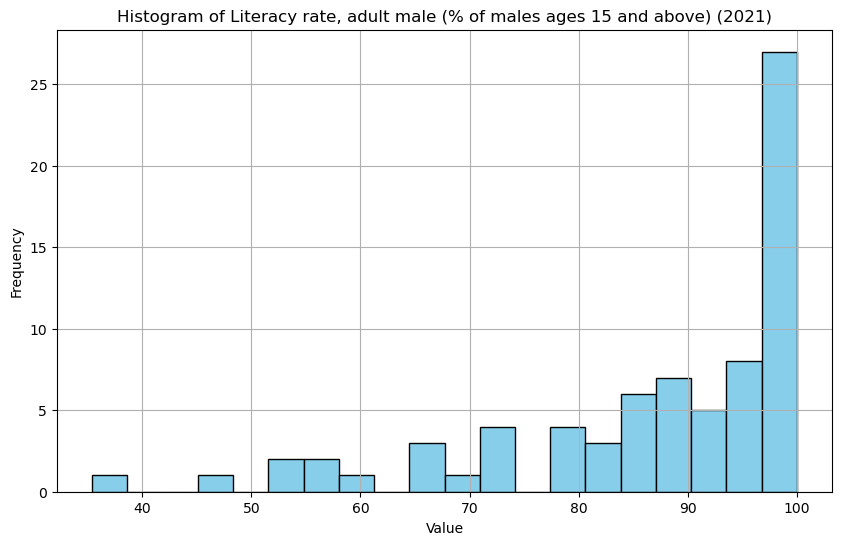

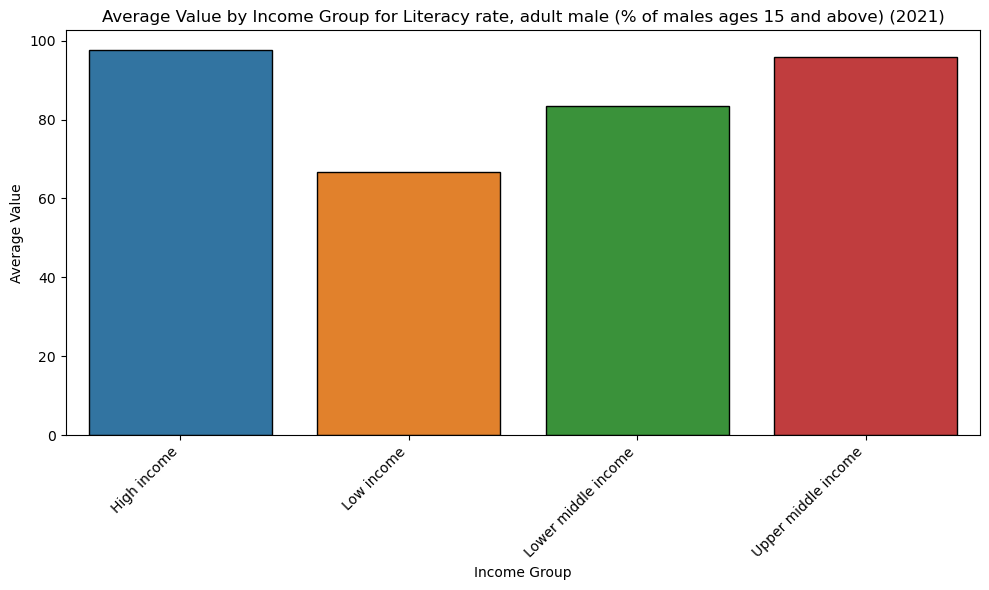

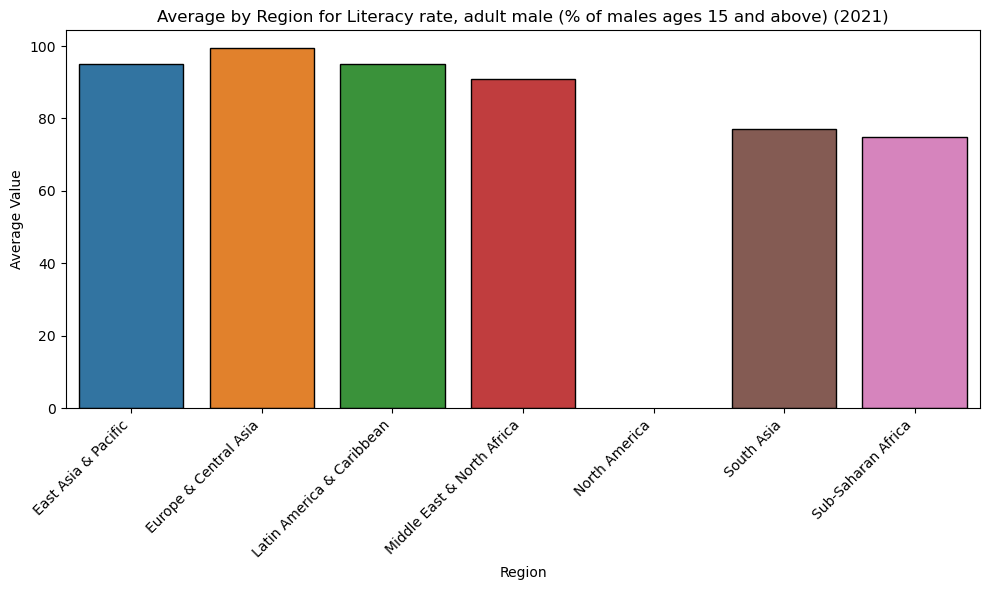

In [14]:
# Create an instance of the DataVisualizer class 
visualizer_Literacy_rate_male = DataVisualizer("DATASETS/Literacy rate, adult male (% of males ages 15 and above)",
                            "API_SE.ADT.LITR.MA.ZS_DS2_en_csv_v2_5729076.csv",
                            "Metadata_Country_API_SE.ADT.LITR.MA.ZS_DS2_en_csv_v2_5729076.csv",
                            "Metadata_Indicator_API_SE.ADT.LITR.MA.ZS_DS2_en_csv_v2_5729076.csv",
                            '2021')  # Change to the desired year

#analyze the data
visualizer_Literacy_rate_male.analyze()

### Observation Report:

**Histogram Analysis:**  
Analyzing the distribution of "Literacy Rate, Adult Male (% of Males Ages 15 and Above)" provides insights into the educational attainment of adult males. The histogram showcases variations in literacy rates among this demographic, reflecting differences in access to education and socio-economic factors.

**Top and Bottom 10 Countries:**  
Identifying the top 10 and bottom 10 countries based on adult male literacy rates reveals disparities in education. Higher literacy rates indicate better educational opportunities and empowerment for men, while lower rates signify challenges that need attention.

**Analysis by Income Group:**  
Categorizing countries by income group in relation to adult male literacy rates highlights the intersection of education and economic development. Higher literacy rates often correspond to higher income levels and improved opportunities for men.

**Analysis by Region:**  
Examining adult male literacy rates by region offers insights into regional disparities in education. Cultural norms, economic conditions, and access to quality education can influence literacy rates among adult males in different parts of the world.

**Conclusion:**  
The "Literacy Rate, Adult Male (% of Males Ages 15 and Above)" indicator underscores the significance of promoting education for men. Enhancing adult male literacy rates contributes to personal empowerment, workforce engagement, and overall societal progress. Addressing disparities in education is crucial for achieving sustainable development and fostering gender equality.

## 10. Tax revenue (% of GDP)


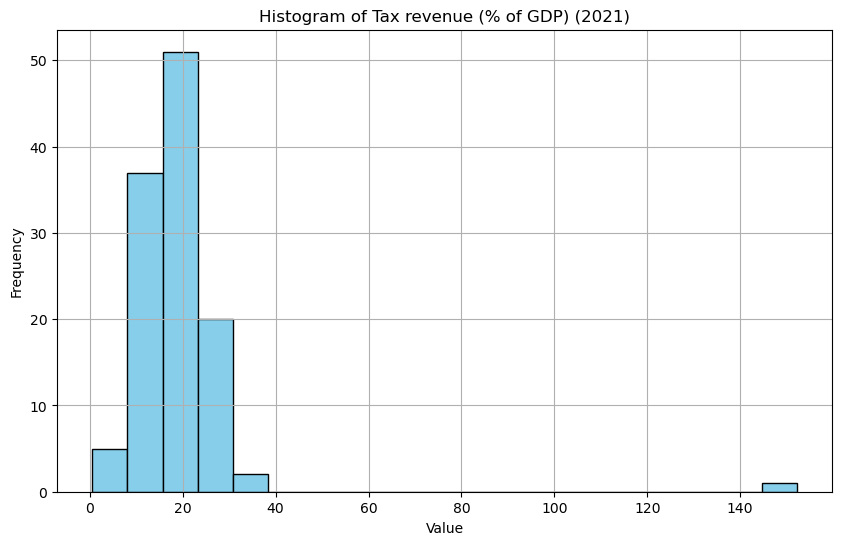

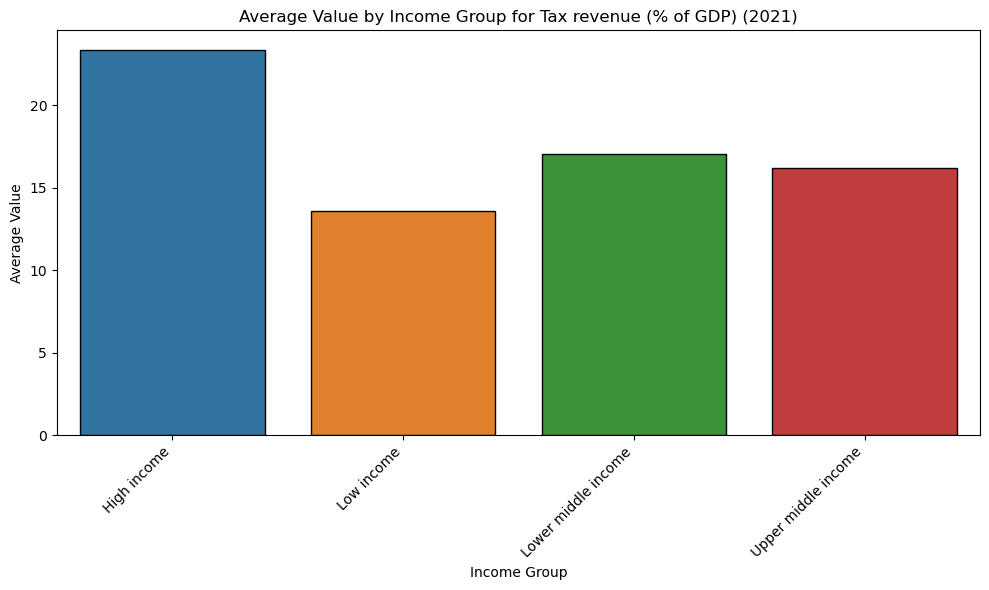

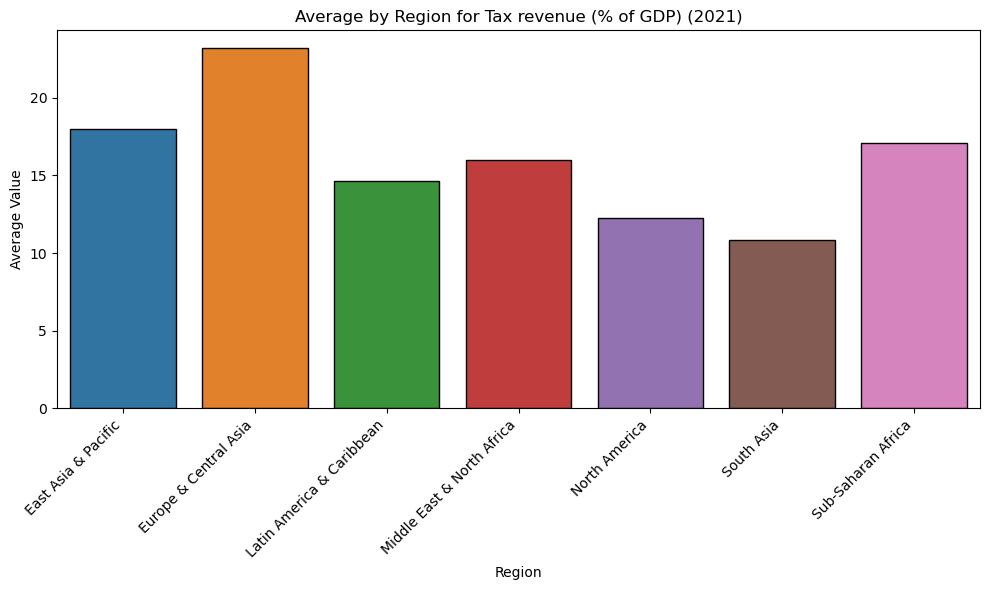

In [15]:
# Create an instance of the DataVisualizer class 
visualizer_Tax = DataVisualizer("DATASETS/Tax revenue (% of GDP)",
                            "API_GC.TAX.TOTL.GD.ZS_DS2_en_csv_v2_5729141.csv",
                            "Metadata_Country_API_GC.TAX.TOTL.GD.ZS_DS2_en_csv_v2_5729141.csv",
                            "Metadata_Indicator_API_GC.TAX.TOTL.GD.ZS_DS2_en_csv_v2_5729141.csv",
                            '2021')  # Change to the desired year

#analyze the data
visualizer_Tax.analyze()

### Observation Report:

**Histogram Analysis:**  
Analyzing the distribution of "Tax Revenue (% of GDP)" provides insights into the extent to which countries rely on taxation to generate government revenue. The histogram illustrates variations in tax revenue as a proportion of GDP, reflecting differences in taxation policies, economic structures, and efficiency of tax collection.

**Top and Bottom 10 Countries:**  
Identifying the top 10 and bottom 10 countries based on tax revenue as a percentage of GDP highlights differences in fiscal policies and economic practices. Higher tax-to-GDP ratios often indicate robust revenue generation, which can fund public services and infrastructure development.

**Analysis by Income Group:**  
Categorizing countries by income group in relation to tax revenue as a percentage of GDP sheds light on the correlation between economic development and taxation. Higher-income countries may have greater capacity for tax collection, while lower-income nations might face challenges in generating substantial tax revenues.

**Analysis by Region:**  
Examining tax revenue as a percentage of GDP by region offers insights into regional variations in fiscal policies and economic priorities. Different regions may adopt diverse taxation approaches to fund public expenditure and achieve developmental goals.

**Conclusion:**  
The "Tax Revenue (% of GDP)" indicator underscores the role of taxation in financing public services and government operations. A well-balanced tax policy that ensures revenue generation while promoting economic growth is essential for sustainable development. Analyzing tax revenue in the context of income groups and regions provides valuable insights into global fiscal practices and their implications for economic progress.

## 11. Population growth (annual %)


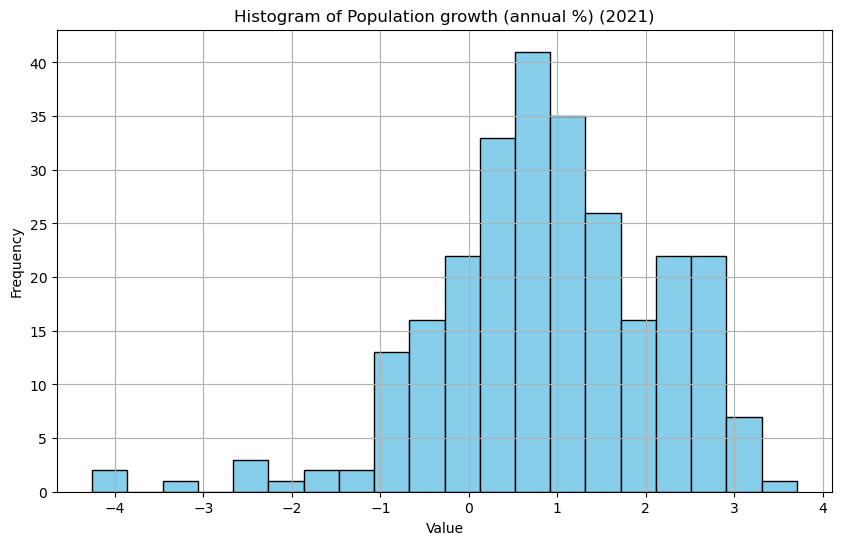

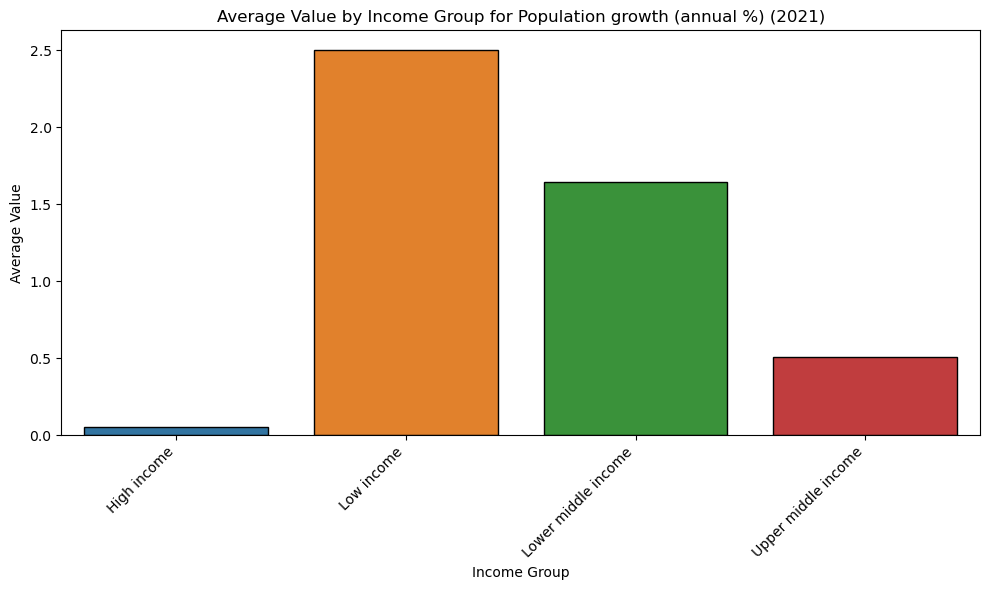

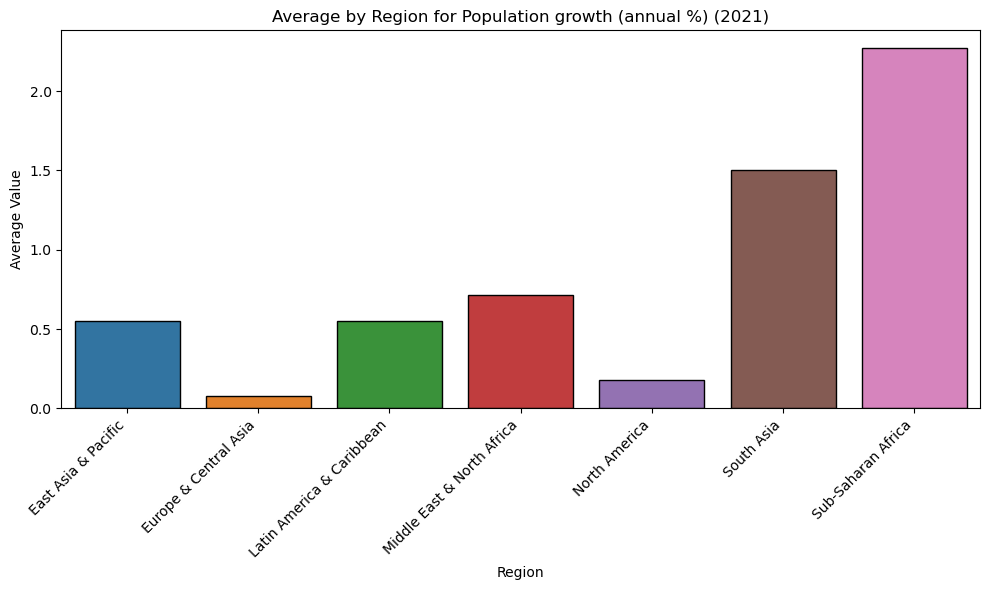

In [16]:
# Create an instance of the DataVisualizer class 
visualizer_Population_growth = DataVisualizer("DATASETS/Population growth (annual %)",
                            "API_SP.POP.GROW_DS2_en_csv_v2_5728986.csv",
                            "Metadata_Country_API_SP.POP.GROW_DS2_en_csv_v2_5728986.csv",
                            "Metadata_Indicator_API_SP.POP.GROW_DS2_en_csv_v2_5728986.csv",
                            '2021')  # Change to the desired year

#analyze the data
visualizer_Population_growth.analyze()

### Observation Report:

**Histogram Analysis:**  
The histogram analysis of "Population Growth (annual %)" provides a visual representation of the distribution of population growth rates across countries. This analysis offers insights into how different nations experience changes in their populations over time, reflecting factors such as birth rates, death rates, and migration.

**Top and Bottom 10 Countries:**  
Identifying the top 10 and bottom 10 countries based on population growth rates helps highlight demographic trends. High population growth may indicate higher birth rates and immigration, while low growth rates may suggest aging populations or emigration.

**Analysis by Income Group:**  
Analyzing population growth rates by income group can reveal how economic development relates to demographic dynamics. Higher-income countries may experience different population trends than lower-income nations, potentially influenced by factors such as healthcare access and family planning.

**Analysis by Region:**  
Exploring population growth rates by region provides insights into geographical variations in demographic patterns. Different regions may face unique challenges and opportunities related to population growth, which can influence social, economic, and environmental dynamics.

**Conclusion:**  
The "Population Growth (annual %)" indicator highlights the dynamic nature of global demographics. Understanding population growth trends is essential for policymakers and researchers to make informed decisions regarding public services, resource management, and urban planning. Analyzing this indicator through the lenses of income groups and regions contributes to a holistic understanding of worldwide demographic shifts and their implications.

## 12. Net migration


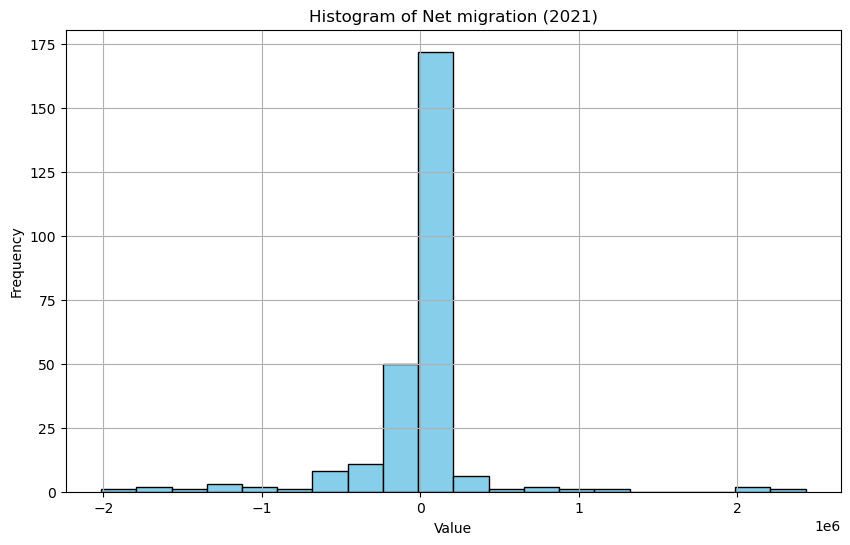

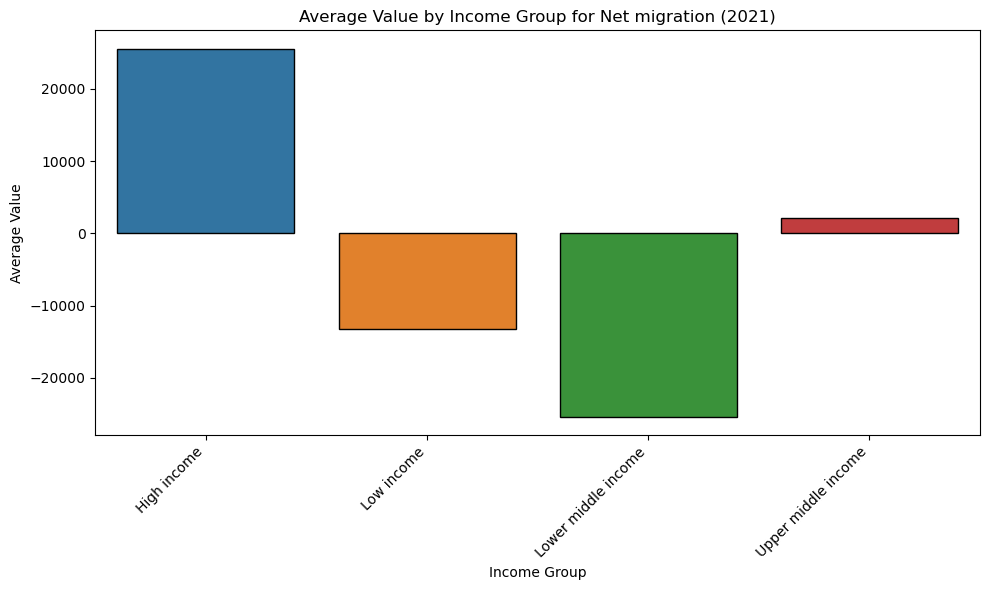

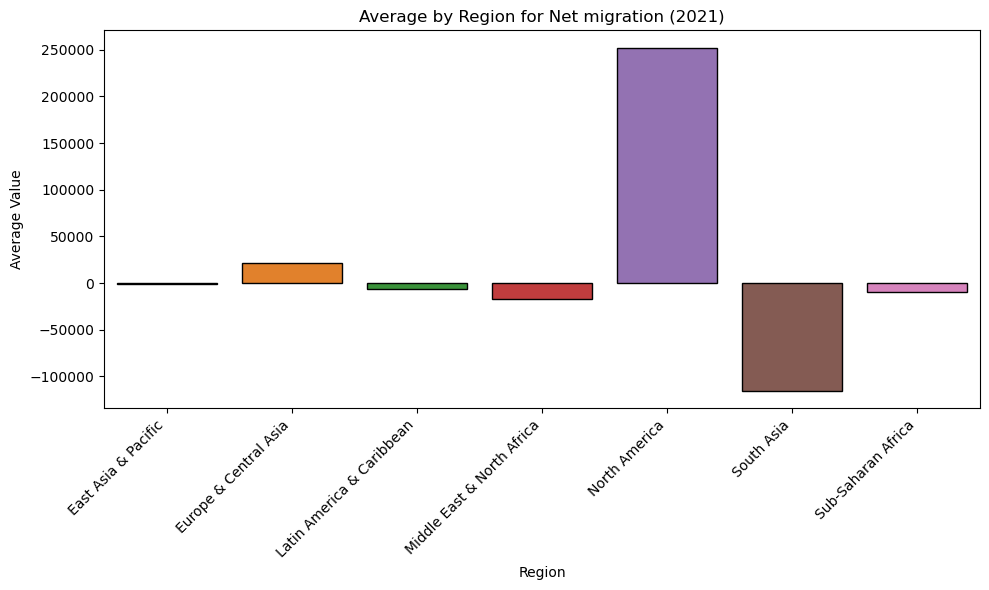

In [17]:
# Create an instance of the DataVisualizer class 
visualizer_Net_migration = DataVisualizer("DATASETS/Net migration",
                            "API_SM.POP.NETM_DS2_en_csv_v2_5728801.csv",
                            "Metadata_Country_API_SM.POP.NETM_DS2_en_csv_v2_5728801.csv",
                            "Metadata_Indicator_API_SM.POP.NETM_DS2_en_csv_v2_5728801.csv",
                            '2021')  # Change to the desired year

#analyze the data
visualizer_Net_migration.analyze()

### Observation Report:

**Histogram Analysis:**  
The histogram analysis of "Net Migration" depicts the distribution of migration rates across countries. This visualization provides an overview of how different nations experience net inflows or outflows of population due to migration, shedding light on factors such as economic opportunities, political stability, and social conditions.

**Top and Bottom 10 Countries:**  
Identifying the top 10 and bottom 10 countries based on net migration rates helps uncover patterns of migration trends. Positive net migration indicates countries that attract more immigrants than emigrants, potentially due to better economic prospects or living conditions.

**Analysis by Income Group:**  
Analyzing net migration rates by income group can offer insights into how economic disparities influence migration patterns. Higher-income countries may be more appealing destinations for migrants seeking improved opportunities, affecting both sending and receiving nations.

**Analysis by Region:**  
Exploring net migration rates by region highlights geographical variations in migration dynamics. Different regions may experience distinct migration patterns influenced by factors like proximity, cultural ties, conflict, and economic disparities.

**Conclusion:**  
The "Net Migration" indicator provides valuable insights into the movement of people across borders, reflecting economic, social, and political factors. Understanding net migration trends is essential for policymakers to address challenges related to labor markets, integration, and social cohesion. By examining net migration rates within income groups and regions, a comprehensive understanding of global migration dynamics and their implications can be achieved.

## 13. Inflation, consumer prices (annual %)

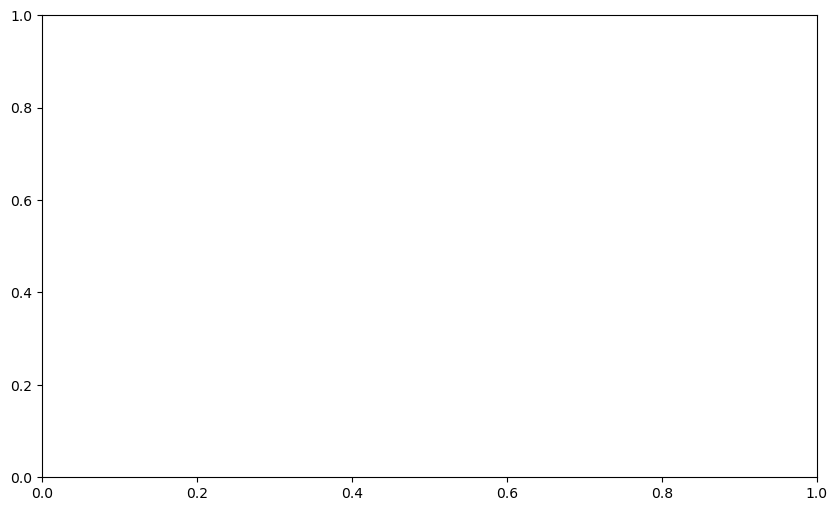

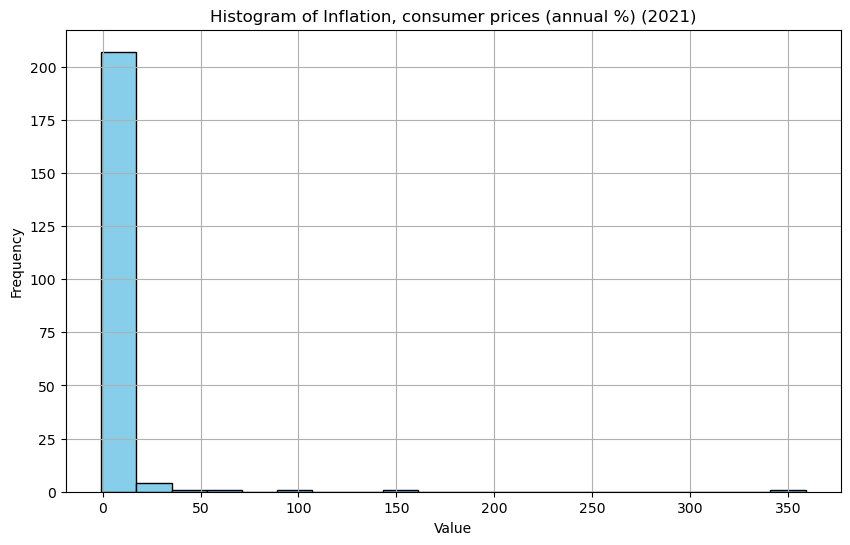

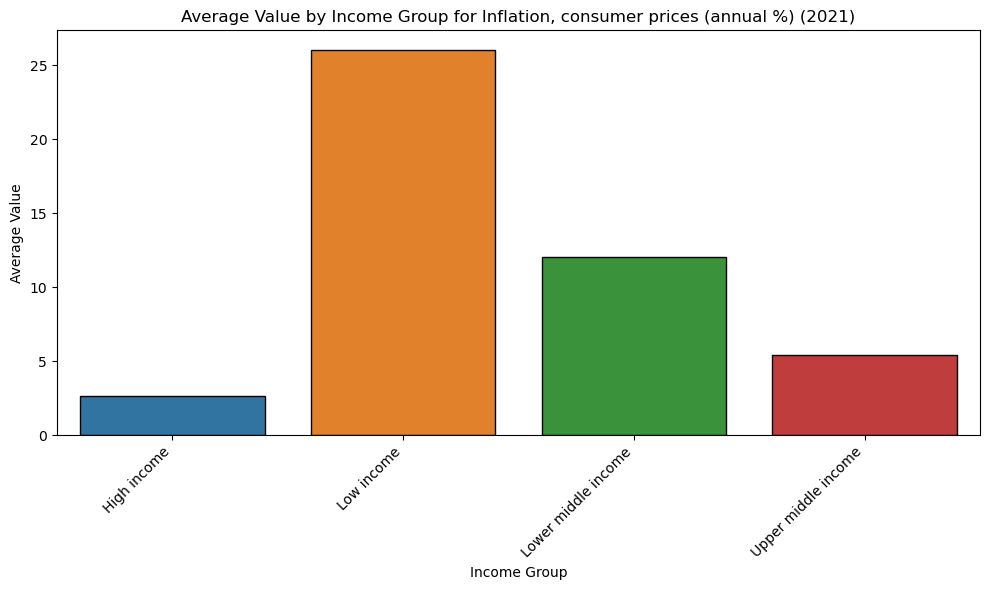

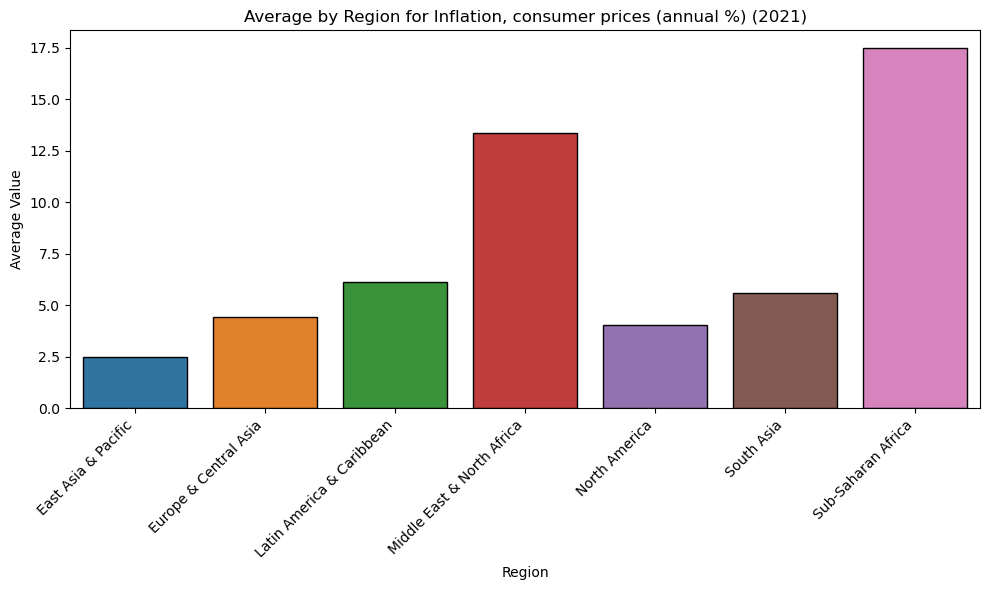

In [19]:
# Create an instance of the DataVisualizer class 
visualizer_Inflation = DataVisualizer("DATASETS/Inflation, consumer prices (annual %)",
                            "API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_5728859.csv",
                            "Metadata_Country_API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_5728859.csv",
                            "Metadata_Indicator_API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_5728859.csv",
                            '2021')  # Change to the desired year

#analyze the data
visualizer_Inflation.analyze()

### Observation Report:

**Histogram Analysis:**  
The histogram analysis of "Inflation, Consumer Prices" portrays the distribution of annual inflation rates across countries. This visualization offers a glimpse into how different nations experience changes in consumer prices over time, reflecting economic stability and monetary policies.

**Top and Bottom 10 Countries:**  
Identifying the top 10 and bottom 10 countries based on inflation rates can reveal extreme fluctuations in consumer prices. High inflation may indicate economic instability, while low inflation suggests price control measures or subdued economic growth.

**Analysis by Income Group:**  
Analyzing inflation rates by income group allows us to understand how economic disparities impact price stability. Lower-income countries might struggle with higher inflation due to challenges in managing monetary policy and supply chains.

**Analysis by Region:**  
Exploring inflation rates by region highlights regional economic trends. Factors such as geopolitical events, commodity prices, and exchange rates can influence inflation dynamics, leading to variations across different parts of the world.

**Conclusion:**  
The "Inflation, Consumer Prices" indicator is crucial for assessing the health of an economy and its impact on citizens' purchasing power. Stable and controlled inflation is often a sign of a well-managed economy, while high inflation can erode savings and disrupt economic planning. By analyzing inflation rates within income groups and regions, policymakers can better understand the drivers of inflation and implement appropriate measures to maintain price stability.